In [64]:
import os

In [65]:
os.chdir("C:\\Users\\Naveen Gandhi\\OneDrive\\Desktop\\Phython\\Datafiles\\Logistic regression")

In [66]:
os.listdir()

['BankCreditCard.csv',
 'cancerdata.csv',
 'Credit_Risk_Test_data.csv',
 'Credit_Risk_Train_data.csv',
 'Credit_Risk_Validate_data.csv',
 'Logistic_Regression_09_Sept_2022.ipynb',
 'Log_ROC.png',
 'submission.csv']

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
data=pd.read_csv('BankCreditCard.csv')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

In [70]:
data.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [71]:
data['Gender']=data['Gender'].astype('object')
data['Academic_Qualification']=data['Academic_Qualification'].astype('object')
data['Marital']=data['Marital'].astype('object')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  object 
 3   Academic_Qualification  30000 non-null  object 
 4   Marital                 30000 non-null  object 
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

In [73]:
data.isnull().sum().sort_values(ascending=True)

Customer ID               0
Previous_Payment_May      0
Previous_Payment_April    0
Previous_Payment_March    0
Previous_Payment_Feb      0
Previous_Payment_Jan      0
June_Bill_Amount          0
May_Bill_Amount           0
April_Bill_Amount         0
March_Bill_Amount         0
Feb_Bill_Amount           0
Previous_Payment_June     0
Jan_Bill_Amount           0
Repayment_Status_May      0
Repayment_Status_April    0
Repayment_Status_March    0
Repayment_Status_Feb      0
Repayment_Status_Jan      0
Age_Years                 0
Marital                   0
Academic_Qualification    0
Gender                    0
Credit_Amount             0
Repayment_Status_June     0
Default_Payment           0
dtype: int64

In [74]:
data=data.drop(['Customer ID'],axis=1)

In [75]:
data_num=data.select_dtypes(np.number)
data_cat=data.select_dtypes('object')

In [76]:
data_num.describe()

,Credit_Amount,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,1.929173e+05,35.485500,0.355200,0.319300,0.302967,0.25670,0.219500,0.224900,81581.060100,52517.103000,...,55122.263933,39939.618800,38506.051533,6285.653867,7.466544e+03,5836.140567,5127.687433,5261.19120,5215.502567,0.221200
std,1.322888e+05,9.217904,0.746984,0.796012,0.781792,0.74388,0.699954,0.700573,123026.372701,80401.365192,...,83577.329356,60373.934792,59104.280171,18944.920299,3.467950e+04,20696.306703,17103.762740,16989.50685,17777.465775,0.415062
min,2.000000e+04,21.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-365580.000000,-58777.000000,...,-270000.000000,-81334.000000,-338603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.000000e+04,28.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3890.000000,3517.000000,...,2671.500000,1763.000000,1256.000000,1000.000000,7.700000e+02,550.000000,333.000000,310.00000,117.750000,0.000000
50%,2.200000e+05,34.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,35661.500000,30538.000000,...,25629.000000,18043.000000,17071.000000,3000.000000,2.542000e+03,1900.000000,1500.000000,1539.00000,1500.000000,0.000000
75%,2.700000e+05,41.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,67091.000000,57420.500000,...,54508.500000,50190.500000,48655.250000,6000.000000,5.000000e+03,5500.000000,4013.250000,5000.00000,4000.000000,0.000000
max,2.000000e+06,79.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,964533.000000,883831.000000,...,992596.000000,827171.000000,861664.000000,973663.000000,2.674259e+06,999055.000000,538897.000000,536539.00000,528666.000000,1.000000


In [77]:
data_num.columns

Index(['Credit_Amount', 'Age_Years', 'Repayment_Status_Jan',
       'Repayment_Status_Feb', 'Repayment_Status_March',
       'Repayment_Status_April', 'Repayment_Status_May',
       'Repayment_Status_June', 'Jan_Bill_Amount', 'Feb_Bill_Amount',
       'March_Bill_Amount', 'April_Bill_Amount', 'May_Bill_Amount',
       'June_Bill_Amount', 'Previous_Payment_Jan', 'Previous_Payment_Feb',
       'Previous_Payment_March', 'Previous_Payment_April',
       'Previous_Payment_May', 'Previous_Payment_June', 'Default_Payment'],
      dtype='object')

In [78]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
minmax.fit_transform(data_num);

In [79]:
data_num=pd.DataFrame(minmax.fit_transform(data_num));
data_num

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000000,0.051724,0.333333,0.333333,0.000000,0.0,0.0,0.000000,0.277806,0.065648,...,0.213845,0.089525,0.282106,0.000000,0.000254,0.000000,0.000000,0.000000,0.000000,1.0
1,0.101010,0.086207,0.000000,0.333333,0.000000,0.0,0.0,0.333333,0.277618,0.064196,...,0.216437,0.093328,0.284823,0.000000,0.000748,0.001001,0.001856,0.000000,0.003783,1.0
2,0.035354,0.224138,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.304425,0.077247,...,0.233117,0.105868,0.295060,0.001663,0.000935,0.001001,0.001856,0.001864,0.009458,0.0
3,0.015152,0.275862,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.310177,0.113632,...,0.237070,0.121289,0.305890,0.003081,0.000759,0.001201,0.002041,0.001992,0.001892,0.0
4,0.015152,0.620690,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.281342,0.068265,...,0.230430,0.109499,0.297212,0.003081,0.013713,0.010009,0.016701,0.001284,0.001284,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.101010,0.310345,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.567266,0.257363,...,0.292258,0.123908,0.295337,0.009860,0.007479,0.005010,0.005654,0.009319,0.001892,0.0
29996,0.116162,0.379310,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.277618,0.064306,...,0.221749,0.095227,0.282106,0.001989,0.001318,0.010008,0.000258,0.000000,0.000000,0.0
29997,0.005051,0.275862,0.666667,0.500000,0.333333,0.0,0.0,0.000000,0.277529,0.065915,...,0.230461,0.112180,0.297400,0.000000,0.000000,0.022021,0.007979,0.005591,0.005864,1.0
29998,0.030303,0.344828,0.166667,0.000000,0.000000,0.0,0.0,0.000000,0.272108,0.145506,...,0.255643,0.102574,0.322801,0.099521,0.001275,0.001180,0.003591,0.100580,0.003412,1.0


In [80]:
data_num.columns=['Credit_Amount', 'Age_Years', 'Repayment_Status_Jan',
       'Repayment_Status_Feb', 'Repayment_Status_March',
       'Repayment_Status_April', 'Repayment_Status_May',
       'Repayment_Status_June', 'Jan_Bill_Amount', 'Feb_Bill_Amount',
       'March_Bill_Amount', 'April_Bill_Amount', 'May_Bill_Amount',
       'June_Bill_Amount', 'Previous_Payment_Jan', 'Previous_Payment_Feb',
       'Previous_Payment_March', 'Previous_Payment_April',
       'Previous_Payment_May', 'Previous_Payment_June','Default_Payment']

In [81]:
data_num.describe()

,Credit_Amount,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.087332,0.249750,0.059200,0.053217,0.050494,0.042783,0.036583,0.037483,0.336183,0.118070,...,0.257503,0.133487,0.314188,0.006456,0.002792,0.005842,0.009515,0.009806,0.009865,0.221200
std,0.066813,0.158929,0.124497,0.132669,0.130299,0.123980,0.116659,0.116762,0.092493,0.085297,...,0.066195,0.066454,0.049243,0.019457,0.012968,0.020716,0.031738,0.031665,0.033627,0.415062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.015152,0.120690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.277773,0.066087,...,0.215961,0.091466,0.283153,0.001027,0.000288,0.000551,0.000618,0.000578,0.000223,0.000000
50%,0.101010,0.224138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301660,0.094753,...,0.234144,0.109385,0.296329,0.003081,0.000951,0.001902,0.002783,0.002868,0.002837,0.000000
75%,0.126263,0.344828,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325289,0.123272,...,0.257017,0.144770,0.322643,0.006162,0.001870,0.005505,0.007447,0.009319,0.007566,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
data_cat=pd.get_dummies(data_cat,drop_first=True)

In [83]:
data_df=pd.concat([data_num,data_cat],axis=1)

In [84]:
data_df.head()

,Credit_Amount,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,...,Default_Payment,Gender_2,Academic_Qualification_2,Academic_Qualification_3,Academic_Qualification_4,Academic_Qualification_5,Academic_Qualification_6,Marital_1,Marital_2,Marital_3
0,0.000000,0.051724,0.333333,0.333333,0.0,0.0,0.0,0.000000,0.277806,0.065648,...,1.0,1,1,0,0,0,0,1,0,0
1,0.101010,0.086207,0.000000,0.333333,0.0,0.0,0.0,0.333333,0.277618,0.064196,...,1.0,1,1,0,0,0,0,0,1,0
2,0.035354,0.224138,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.304425,0.077247,...,0.0,1,1,0,0,0,0,0,1,0
3,0.015152,0.275862,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.310177,0.113632,...,0.0,1,1,0,0,0,0,1,0,0
4,0.015152,0.620690,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.281342,0.068265,...,0.0,0,1,0,0,0,0,1,0,0


In [85]:
X=data_df.drop(['Default_Payment'],axis=1)
Y=data_df['Default_Payment']

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30)

In [87]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((21000, 29), (9000, 29), (21000,), (9000,))

In [88]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [89]:
predict=log_reg.predict(x_test)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))


              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      7017
         1.0       0.70      0.32      0.44      1983

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



In [91]:
data['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

In [92]:
#there is clear class imbalnce problem
#hence using SMOTE TECHINIQUE

from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')

X_sm,Y_sm=smote.fit_resample(X,Y)


In [93]:
Y_sm.value_counts()

1.0    23364
0.0    23364
Name: Default_Payment, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_sm,Y_sm,test_size=0.30,random_state=0)

In [95]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [96]:
predict=log_reg.predict(x_test)

In [97]:
log_reg.predict_proba(x_test)

array([[0.70109935, 0.29890065],
       [0.62353636, 0.37646364],
       [0.58096642, 0.41903358],
       ...,
       [0.63571731, 0.36428269],
       [0.77378823, 0.22621177],
       [0.08994764, 0.91005236]])

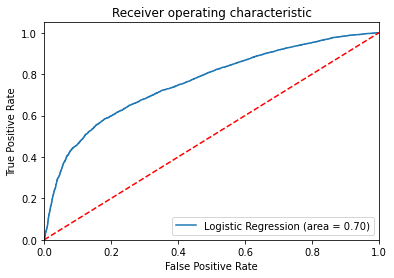

In [98]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,log_reg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test,log_reg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.65      0.83      0.73      6952
         1.0       0.78      0.57      0.65      7067

    accuracy                           0.70     14019
   macro avg       0.71      0.70      0.69     14019
weighted avg       0.72      0.70      0.69     14019



In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict)

array([[5796, 1156],
       [3069, 3998]], dtype=int64)

<AxesSubplot:>

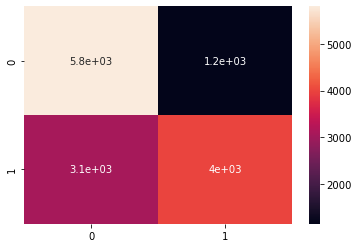

In [101]:
sns.heatmap(confusion_matrix(y_test,predict),annot=True)

In [102]:
#checking for misclassification
#Bagging or boosting
from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier(random_state=0)
bagging.fit(x_train,y_train)

BaggingClassifier(random_state=0)

In [103]:
predict=bagging.predict(x_test)

In [104]:
bagging.predict_proba(x_test)

array([[0.8, 0.2],
       [0.2, 0.8],
       [0. , 1. ],
       ...,
       [0.1, 0.9],
       [0.9, 0.1],
       [0. , 1. ]])

In [105]:
print(classification_report(y_test,predict))


              precision    recall  f1-score   support

         0.0       0.81      0.88      0.85      6952
         1.0       0.87      0.80      0.84      7067

    accuracy                           0.84     14019
   macro avg       0.84      0.84      0.84     14019
weighted avg       0.84      0.84      0.84     14019



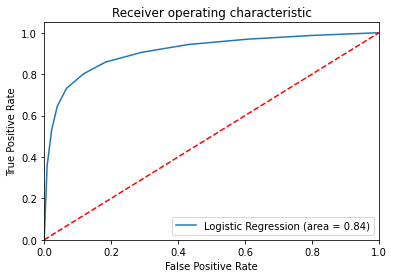

In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,bagging.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test,bagging.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#After Bagging got imporved we can see the recision and recall imporved and even the accuracy is also imporved
#here before there was class imbalance problem it was cleared by SMOTE tecnoque and made use that data and chked for
#misclassification and used bagging here

In [109]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.572541
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Default_Payment   No. Observations:                32709
Model:                          Logit   Df Residuals:                    32680
Method:                           MLE   Df Model:                           28
Date:                Thu, 29 Dec 2022   Pseudo R-squ.:                  0.1740
Time:                        14:35:41   Log-Likelihood:                -18727.
converged:                       True   LL-Null:                       -22672.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Credit_Amount               -2.8348      0.234    -12.101      0.000      -3.294

In [110]:
#Usin adaboost
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(random_state=0)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(random_state=0)

In [111]:
predict=adaboost.predict(x_test)

In [112]:
adaboost.predict_proba(x_test)

array([[0.50263751, 0.49736249],
       [0.50121752, 0.49878248],
       [0.50033784, 0.49966216],
       ...,
       [0.50077793, 0.49922207],
       [0.5105278 , 0.4894722 ],
       [0.48945827, 0.51054173]])

In [113]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.74      0.82      0.77      6952
         1.0       0.80      0.71      0.75      7067

    accuracy                           0.76     14019
   macro avg       0.77      0.76      0.76     14019
weighted avg       0.77      0.76      0.76     14019



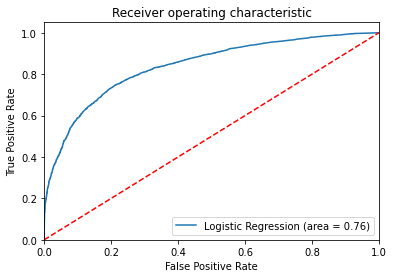

In [114]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,adaboost.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test,adaboost.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()